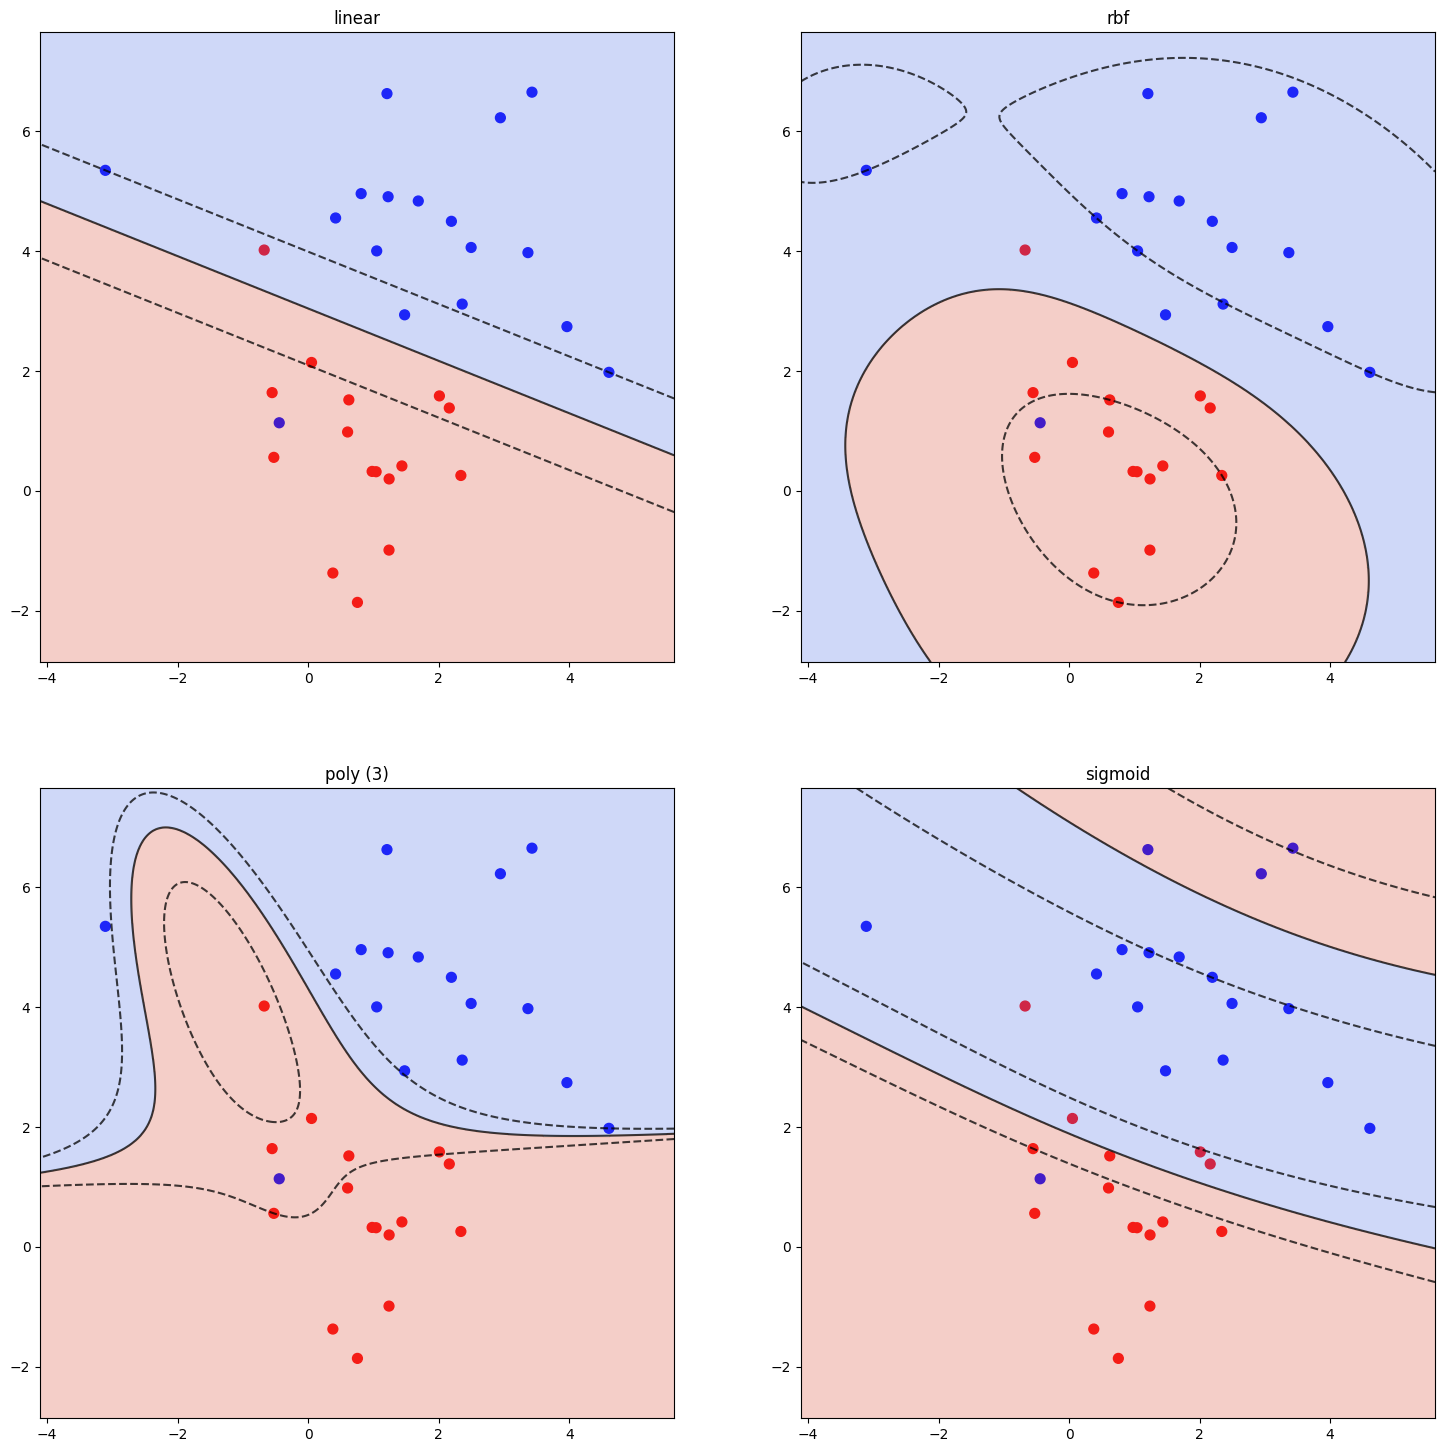

In [1]:
import numpy as np
from model import SVM
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def plot(X, y, model, axes, name):
  plt.axes(axes)
  xlim = [np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1]
  ylim = [np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1]
  xx, yy = np.meshgrid(np.linspace(*xlim, num=400), np.linspace(*ylim, num=400))
  
  model.fit(X, y)
  z_model = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')
  plt.contour(xx, yy, z_model, colors='k', levels=[-1, 0, 1], alpha=0.75, linestyles=['--', '-', '--'])
  plt.contourf(xx, yy, np.sign(z_model.reshape(xx.shape)), alpha=0.3, levels=2, cmap='coolwarm', zorder=1)
  plt.title(name)


X, y = make_blobs(n_samples=52, centers=2, random_state=0, cluster_std=1.6)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 18))
plot(X, y, SVM(kernel='linear'), axs[0][0], "linear")

plot(X, y, SVM(kernel='rbf'), axs[0][1], "rbf")

plot(X, y, SVM(kernel='poly'), axs[1][0], "poly (3)")

plot(X, y, SVM(kernel='sigmoid'), axs[1][1], "sigmoid")